# **Web scraping using beautifulsoup**

In this tutorial we will develop a web scraper to extract online review data from an online review site.

## Load libraries

For this scaper we will use beautifulsoup and requests python packages. Both the packages comes pre-installed with Google Colab, however, if you are using your own environment, you would need to install the both.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Design the scraper

Specify the URL you need to scrape data from.
The following commands will fetch the web structure of the url and assign it to the object 'soup' which we can use to extract data.

In [ ]:
url = 'https://www.productreview.com.au/listings/nab-national-australia-bank'

In [ ]:
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")

## **Scraping data from html elements**

We need to extract the reviews from this page. 

First, find the corresponding html element which contains reviews. 
Visit the website, right click -> Inspect element -> identify the html element name which contains the review. (Use Google Chrome or Firefox)

The command **findAll**  will find all the elements with the given name. In this case, it will fetch all the div elements with the class names **mb-0_wJE overflow-hidden_1pr card_12c card-full_1bA card-full-md_1Kd** in the **class** attribute.

How it looks on browser as follows:

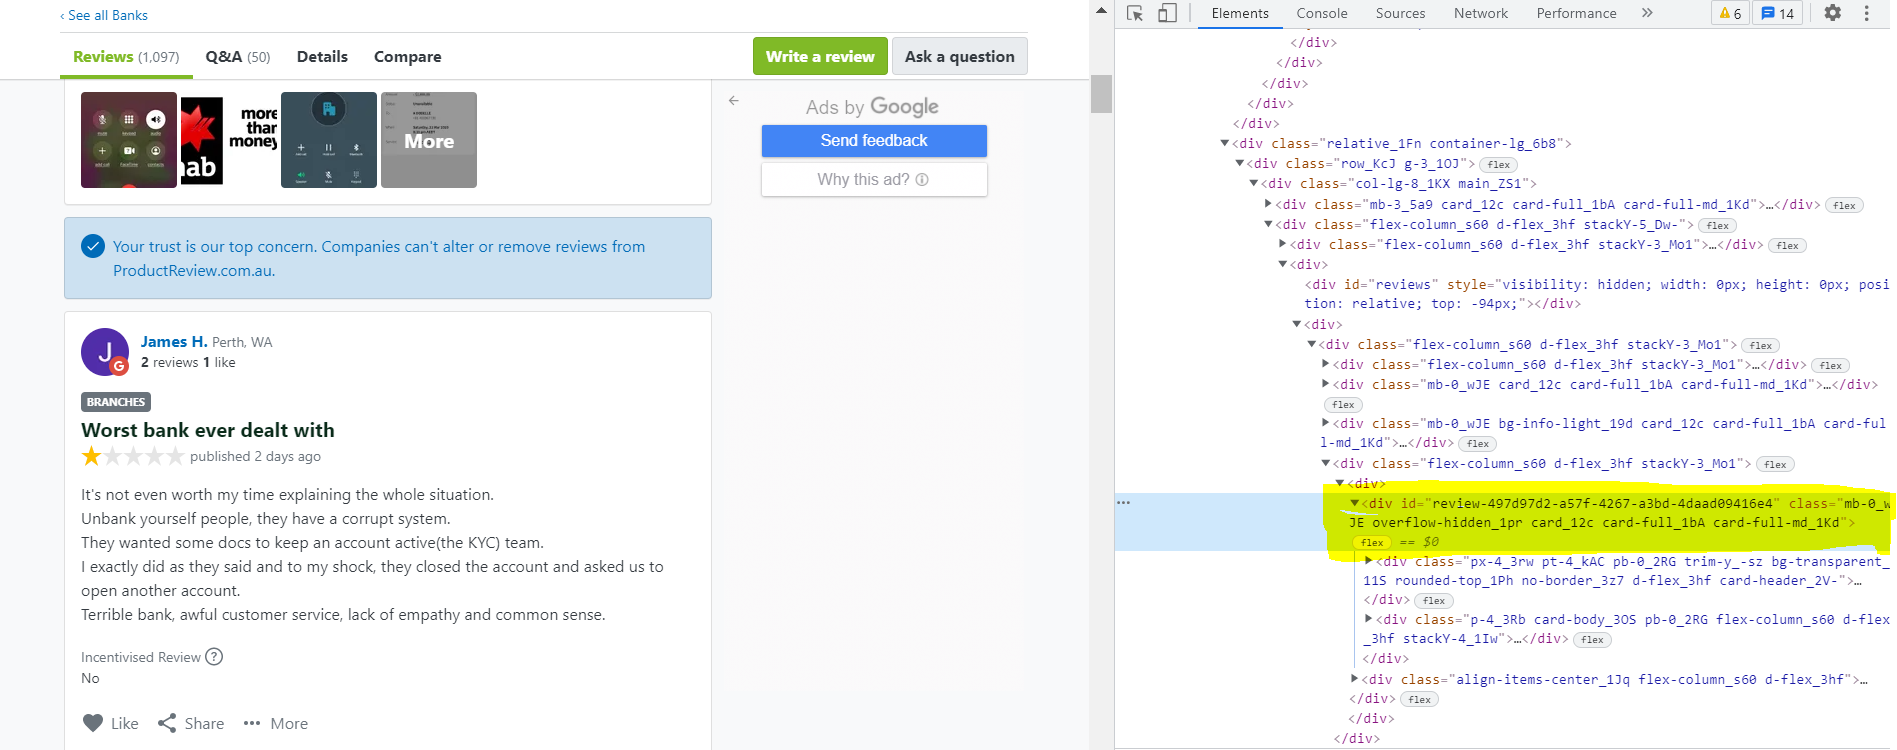

In [8]:
all_reviews = soup.findAll("div", {"class": "mb-0_wJE overflow-hidden_1pr card_12c card-full_1bA card-full-md_1Kd"})

In [9]:
print('Length of reviews: {}'.format(len(all_reviews)))

Length of reviews: 15


Observe the structure of one element.

In [10]:
print(all_reviews[5])

<div class="mb-0_wJE overflow-hidden_1pr card_12c card-full_1bA card-full-md_1Kd" id="review-98654100-7185-4d49-87ce-f6bb9171cebf"><div class="px-4_3rw pt-4_kAC pb-0_2RG trim-y_-sz bg-transparent_11S rounded-top_1Ph no-border_3z7 d-flex_3hf card-header_2V-"><div class="align-items-start_27k flex-row_NAd flex-grow-1_29C relative_1Fn d-flex_3hf overflow-x-hidden_3vV stackX-3_3C2"><img alt="deceased" class="flex-shrink-0_2yX rounded-circle_2pL img-cover_2bl" height="48" loading="lazy" src="https://cdn.productreview.com.au/resize/avatar/a5eda456-5e4b-3486-ad43-88856e0356c3?width=48&amp;height=48&amp;cover=&amp;v=2" srcset="https://cdn.productreview.com.au/resize/avatar/a5eda456-5e4b-3486-ad43-88856e0356c3?width=48&amp;height=48&amp;dpr=2&amp;cover=&amp;v=2 2x" title="deceased" width="48"/><div class="align-self-center_30m flex-basis-auto_3xE flex-column_s60 flex-grow-1_29C d-flex_3hf overflow-hidden_1pr"><span class="h4 mb-0_wJE align-items-baseline_1bv flex-row_NAd d-inline-flex_1yO"><a c

Now we need to iterate over the **all_reviews** object and process each element.  
Identify the html elements corresponding to:

*   Title
*   Review text
*   Date
*   Star rating


**Note:** Certain values are placed as 'attributes' of a html component. In such scenarios, you have to access the value using a different syntax (Observe the codes for accessing date and review rating)

In [13]:
all_reviews[0].find('h3', {"class": "mb-1_2Ff"}).text

'Worst bank ever dealt with'

In [14]:
reviews = []

for reviewBox in all_reviews:

    # get review title
    review_title = reviewBox.find('h3', {"class": "mb-1_2Ff"}).text
    
    # get review
    review_text = reviewBox.find('p', {"class": "mb-0_wJE"}).text
    
    # get date
    # date is placed as an attribute of the html element. These are indicated by the word 'attr' in the html structure. You can access them as follows:
    review_date = reviewBox.find("time").attrs['datetime']

    # get star rating
    review_stars = reviewBox.find('div', {'class': 'me-1_2lk'}).attrs['title']
    
    # append the process review and the title to the reviews list
    reviews.append([review_title, review_text, review_date, review_stars])

Explore the extracted reviews.

In [15]:
len(reviews)

15

In [ ]:
reviews

Compose a dataframe using the review data.

In [16]:
output_column_names = ['title', 'review', 'date', 'stars']
data = pd.DataFrame(reviews, columns=output_column_names)

Write the dataframe to a csv. The dataframe will be saved in Files tab.

In [ ]:
data.to_csv('nab_reviews.csv', index=None)